In [1]:
!pip install pandas scikit-learn sentence-transformers matplotlib seaborn

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 55.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 45.7 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 29.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ 4Í∞úÎ°ú ÏãúÎèÑ
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("/content/drive/MyDrive/·ÑÜ·ÖÆ·Ü´·Ñí·Ö™data/Ontology_positive_reviews8.csv")

# 2. Î¨∏Ïû• ÏûÑÎ≤†Îî© (BGE-M3 ÎòêÎäî KR-SBERT Îì±)
model = SentenceTransformer("snunlp/KR-SBERT-V40K-klueNLI-augSTS")  # ColabÏóêÏÑ† Ïù¥ Î™®Îç∏ Ï∂îÏ≤ú
embeddings = model.encode(df["review"].tolist(), show_progress_bar=True)

# 3. ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ (KMeans, ÌÅ¥Îü¨Ïä§ÌÑ∞ ÏàòÎäî ÏûÑÏùòÎ°ú ÏßÄÏ†ï)
n_clusters = 4  # ÌïÑÏöîÏóê Îî∞Îùº Ï°∞Ï†ï
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df["cluster"] = kmeans.fit_predict(embeddings)

# 4. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú Î¶¨Î∑∞ Ï∂îÏ∂ú (ÌÅ¥Îü¨Ïä§ÌÑ∞ Ï§ëÏã¨Í≥º Í∞ÄÏû• Í∞ÄÍπåÏö¥ Î¶¨Î∑∞)
from sklearn.metrics import pairwise_distances_argmin_min
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, embeddings)

print("\nüìå ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú Î¶¨Î∑∞ ÏòàÏãú:")
for cluster_num in range(n_clusters):
    idx = closest[cluster_num]
    print(f"\n[Cluster {cluster_num}]")
    print(f"- Drama: {df.iloc[idx]['drama']}")
    print(f"- Review: {df.iloc[idx]['review']}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/707 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/467M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/467M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/24 [00:00<?, ?it/s]


üìå ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÎåÄÌëú Î¶¨Î∑∞ ÏòàÏãú:

[Cluster 0]
- Drama: ÏáºÌïëÏôï Î£®Ïù¥
- Review: ÎÇòÎ¶Ñ ÏºÄÎØ∏ Ï¢ãÎÑ§ ÏÉùÍ∞ÅÎ≥¥Îã§ Îçî Ï¢ãÎÑ§ Îçß. Î¶¨Ìä∏Î¶¨Î≤ÑÍ∞Ä ÏÉùÍ∞ÅÎÇúÎãº„Öã„Öã ÎàÑÍµ∞ÏßÄÎäî Î≥¥Î©¥ ÏïåÎìØ

[Cluster 1]
- Drama: Ï∂îÎ¶¨Ïùò Ïó¨Ïôï
- Review: Ï†ÑÌé∏Ï≤òÎüº Ïû¨ÎØ∏Ï°åÏúº „Öé

[Cluster 2]
- Drama: ÎïêÎΩÄÍ±∏Ï¶à
- Review: Î¨¥ÏóáÏù¥Îì† Í≥ºÏ†ïÍ≥º Í≤∞Ïã§, Í∑∏ ÏïàÏóêÏÑúÏùò Í¥ÄÍ≥ÑÍ∞Ä Ï£ºÎäî Í∏∞ÏÅ®ÏùÄ Ï∞∏ Ï¢ãÎã§. ÎÖ∏Î†•Ìï†ÏàòÎ°ù ÎçîÎçîÏö±. Í∑∏Í±∏ ÎäêÍª¥Î≥∏ ÏßÄÍ∞Ä Ï∞∏ Ïò§ÎûòÎêú Í≤É Í∞ôÎã§. / ÏπúÏàôÌïú ÌíçÍ≤Ω ÏÜç Î™∞ÎûêÎçò Ïù¥ÏïºÍ∏∞ / ÌïôÏÉùÎì§Ïùò ÏóêÎÑàÏßÄÍ∞Ä ÎåÄÎã®ÌïòÎã§ „Öé„Öé - CGV ÌÜµÏòÅ 1520 6E5

[Cluster 3]
- Drama: Ïò•ÌÉëÎ∞© ÏôïÏÑ∏Ïûê
- Review: Ïú†ÏπòÎΩïÏßùÌïòÏßÄÎßå ÎÑàÎ¨¥ Ïã†ÏÑ†ÌñàÎçò Ï¢ãÏùÄ ÎìúÎùºÎßà


In [4]:
import numpy as np
print("\nüìå ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï†ÑÏ≤¥ Î¶¨Î∑∞ ÏòàÏãú:")

for cluster_num in range(n_clusters):
    print(f"\n[Cluster {cluster_num}]")
    cluster_indices = np.where(kmeans.labels_ == cluster_num)[0]  # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïú Ïù∏Îç±Ïä§
    for idx in cluster_indices:
        print(f"- Drama: {df.iloc[idx]['drama']}")
        print(f"- Review: {df.iloc[idx]['review']}")
    print(f"‚ñ∂ Ï¥ù Î¶¨Î∑∞ Ïàò: {len(cluster_indices)}Í∞ú\n")


üìå ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Ï†ÑÏ≤¥ Î¶¨Î∑∞ ÏòàÏãú:

[Cluster 0]
- Drama: (ÏïÑÎäî Í±¥ Î≥ÑÎ°ú ÏóÜÏßÄÎßå) Í∞ÄÏ°±ÏûÖÎãàÎã§
- Review: Í∞ÄÏ°±ÏùÄ Í∞ôÏù¥ ÏÇ¥ÏïÑÏò® ÏÑ∏ÏõîÏù¥Îã§.
- Drama: Í∞ÄÎ©¥
- Review: Î©îÏù¥ Î≥¥Î†§Í≥† Î¥£Ïñ¥Ïöî
- Drama: Í±∞Ïπ®ÏóÜÏù¥ ÌïòÏù¥ÌÇ•
- Review: ÎÇòÌïúÌÖåÎäî Ïù¥Í≤å Ï†ÑÏõêÏùºÍ∏∞ÎùºÍ≥†
- Drama: Í≤®Ïö∏Ïó∞Í∞Ä
- Review: ÎßûÎäîÏÉâÍπîÏùÑ ÏûÖÏóàÏùÑÎïå
- Drama: Í≤ΩÏö∞Ïùò Ïàò
- Review: ÎèåÍ≥† ÎèåÍ≥† Îòê ÎèåÍ≥†.
- Drama: Í≤ΩÏö∞Ïùò Ïàò
- Review: ÌôïÎ•†Ïù¥ ÎÇÆÏïÑ
- Drama: Í≥ÑÎ£°ÏÑ†ÎÖÄÏ†Ñ
- Review: Ïò≥ÏßÄ Ï∞©ÌïòÎã§
- Drama: Í≥ÑÎ£°ÏÑ†ÎÖÄÏ†Ñ
- Review: Î≠âÍ∏ÄÎ≠âÍ∏ÄÌï¥
- Drama: Í≥µÏûëÎèÑÏãú
- Review: ÎßàÏù∏Ïù¥Îûë ÎπÑÏä∑Ìïú ÎäêÎÇå
- Drama: Íµ¨ÎØ∏Ìò∏Îéê
- Review: Í∑∏Îûò, ÎÇ¥Í≤ê ÌïúÍµ≠ ÏÑ§ÌôîÍ∞Ä ÌïÑÏöîÌñàÏñ¥!
- Drama: Íµ¨ÎØ∏Ìò∏Îéê
- Review: ‚ô•Ô∏é
- Drama: Íµ¨ÎØ∏Ìò∏Îéê
- Review: Î≥¥Í≤åÎêúÎã§..
- Drama: Íµ∞Í≤ÄÏÇ¨ ÎèÑÎ≤†Î•¥Îßå
- Review: Î¨¥Î≤ïÎ≥ÄÌò∏ÏÇ¨ ÏûëÍ∞ÄÎûòÏÑú ÎßéÏùÄ Í≤å ÎÇ©Îìù Îê®
- Drama: Íµ∞Í≤ÄÏÇ¨ ÎèÑÎ≤†Î•¥Îßå
- Review: ÏûëÍ∞ÄÍ∞Ä Î≠ê Ïñ¥ÎñªÍ∏∏Îûò ÌïòÍ≥† Î¥§ÎçîÎãà ÏïÑ Í∑∏Î†áÍµ¨ÎÇò Ïã∂Îã§.


Selecting previously unselected package fonts-nanum.
(Reading database ... 126308 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


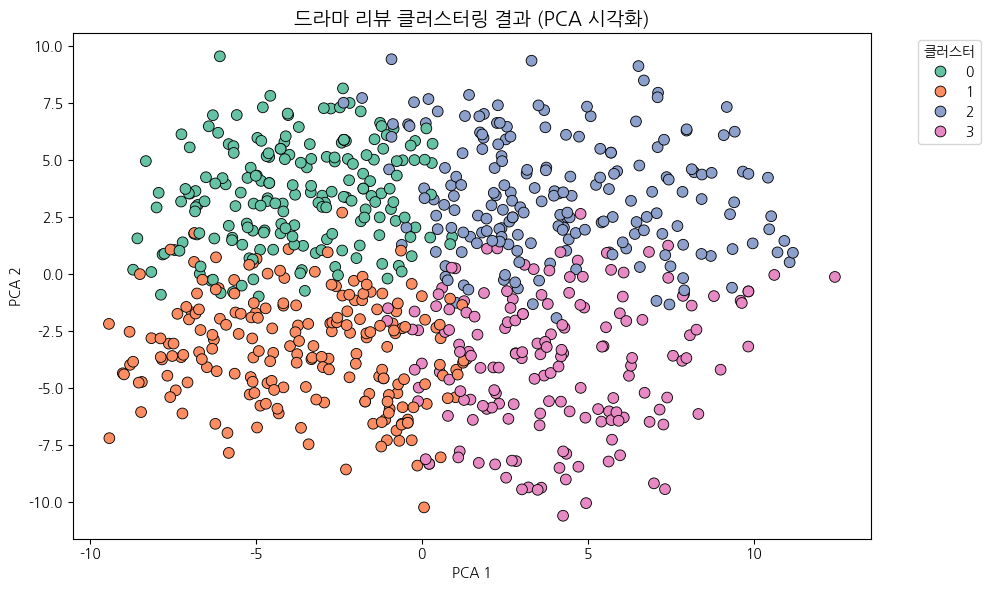

In [5]:
# üìå 1. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ïπò Î∞è Îì±Î°ù
!apt-get -qq install -y fonts-nanum

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns
import os

# üìå 2. ÎÇòÎàîÍ≥†Îîï Ìè∞Ìä∏ Í≤ΩÎ°ú Îì±Î°ù
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False  # ÏùåÏàò Íπ®Ïßê Î∞©ÏßÄ

# üìå 3. PCA Ï∞®Ïõê Ï∂ïÏÜå Î∞è ÏãúÍ∞ÅÌôî
from sklearn.decomposition import PCA

# 5. Ï∞®Ïõê Ï∂ïÏÜå (PCA ÏÇ¨Ïö©)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)
df["pca_x"] = reduced_embeddings[:, 0]
df["pca_y"] = reduced_embeddings[:, 1]

# 6. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="pca_x", y="pca_y",
    hue="cluster",
    data=df,
    palette="Set2",
    s=60, edgecolor="black"
)
plt.title("ÎìúÎùºÎßà Î¶¨Î∑∞ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥º (PCA ÏãúÍ∞ÅÌôî)", fontsize=14)
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title="ÌÅ¥Îü¨Ïä§ÌÑ∞", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## ÏõåÎìú ÌÅ¥ÎùºÏö∞Îìú

In [6]:
# üìå 1. ÏÑ§Ïπò (ÏΩîÎû©ÏóêÏÑúÎßå ÌïÑÏöî)
!pip install konlpy wordcloud
!apt-get -qq install -y fonts-nanum

# üìå 2. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏûÑÌè¨Ìä∏
from konlpy.tag import Okt
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import os

# üìå 3. ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"
fm.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 19.4/19.4 MB 42.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 494.1/494.1 kB 19.8 MB/s eta 0:00:00


In [7]:
# üìå 4. Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò: Î™ÖÏÇ¨ Ï∂îÏ∂ú + Î∂àÏö©Ïñ¥ Ï†úÍ±∞ + Ìïú Í∏ÄÏûê Ï†úÍ±∞
okt = Okt()

stopwords = {
    "ÎìúÎùºÎßà", "ÏÇ¨Îûå", "Í∑∏ÎÉ•", "ÏÉùÍ∞Å", "Îã§Ïãú", "Ïù¥ÏïºÍ∏∞", "ÎÇòÎùº", "Î∞îÎ≥¥",
    "ÏßÄÍ∏à", "Ïù¥Ï†ú", "Í≥ºÍ±∞", "Î≠îÍ∞Ä", "Î¨¥Ïä®", "Î≠ê", "Í∑∏", "Î°úÏç®", "Ïù¥ÎßàÏù¥",
    "Îòê", "Ï†ïÎèÑ", "Ïù¥Î†áÍ≤å", "Í∑∏Î¶¨Í≥†", "Ï†ïÎßê", "ÏßÑÏßú", "Î∞∞Ïö∞", "ÏòÅÌôî", "ÏûëÍ∞Ä","ÏãúÏûë",
    "Ï†ÑÍ∞ú", "ÎÇ¥Ïö©", "Í≥ºÏ†ï", "ÏÜçÎèÑ", "Ï£ºÏ†ú", "ÏÉÅÌô©", "Î≥¥Îã§", "Î≥¥Îäî", "Î¥§Îã§", "Ïù¥Îü∞",
    "Í∑∏", "Í∑∏Îïå", "Ïù¥Í±¥", "Í∑∏Îü∞", "ÏãúÏûë", "ÏÑ§Í≥Ñ", "Ï†ÑÌôò"
}

def preprocess(text):
    tokens = okt.nouns(text)              # Î™ÖÏÇ¨Îßå Ï∂îÏ∂ú
    tokens = [t for t in tokens if len(t) > 1 and t not in stopwords]  # Ìïú Í∏ÄÏûê Ï†úÍ±∞ + Î∂àÏö©Ïñ¥ Ï†úÍ±∞
    return tokens

In [8]:
# üìå 5. ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± Ìï®Ïàò
def make_wordcloud_by_cluster(df, cluster_num, font_path):
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞ Î¶¨Î∑∞ Ï∂îÏ∂ú
    texts = df[df['cluster'] == cluster_num]['review'].dropna().tolist()

    # Î™®Îì† ÌÖçÏä§Ìä∏ Î≥ëÌï© Î∞è ÌÜ†ÌÅ∞Ìôî
    all_tokens = []
    for text in texts:
        all_tokens.extend(preprocess(text))

    # Îã®Ïñ¥ ÎπàÎèÑ Í≥ÑÏÇ∞
    counter = Counter(all_tokens)

    # ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
    wordcloud = WordCloud(
        font_path=font_path,
        background_color='white',
        width=800,
        height=400,
        max_words=100
    ).generate_from_frequencies(counter)

    # ÏãúÍ∞ÅÌôî
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_num} ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú', fontsize=16)
    plt.show()


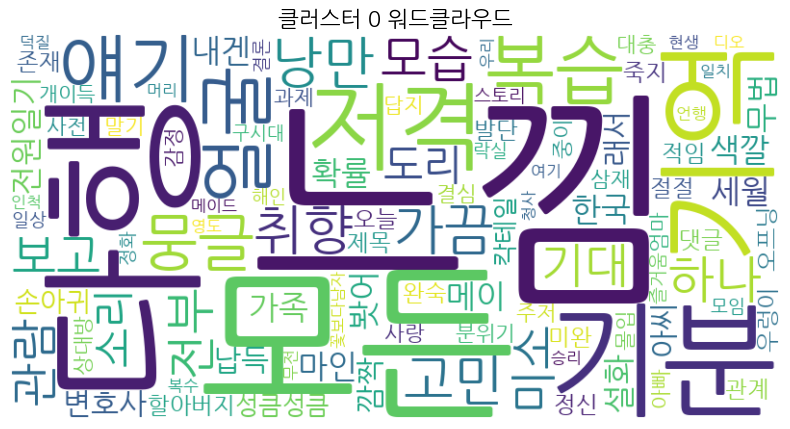

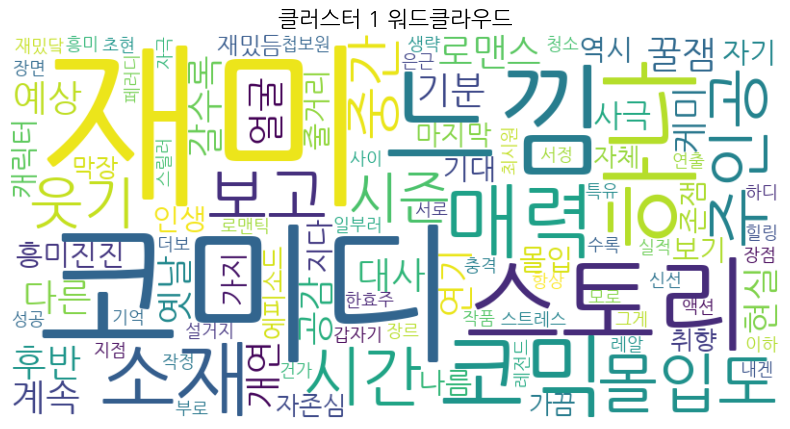

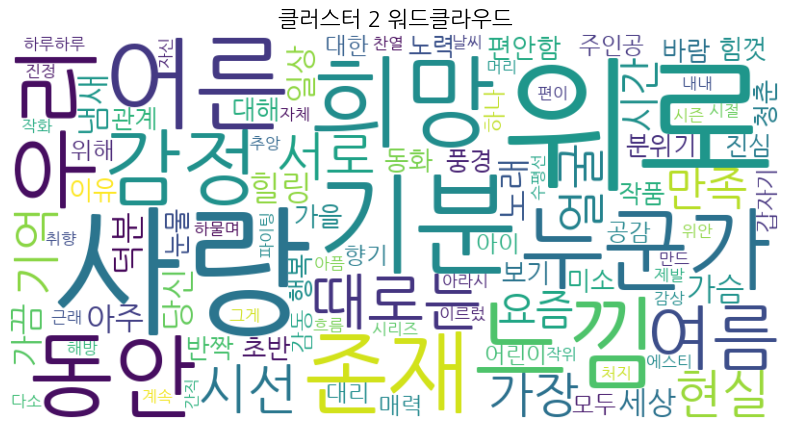

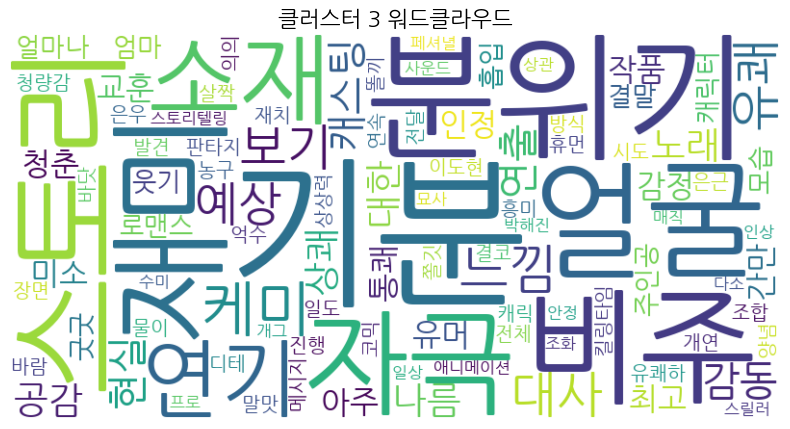

In [9]:
# üìå 6. Ï†ÑÏ≤¥ ÌÅ¥Îü¨Ïä§ÌÑ∞ Î∞òÎ≥µ Ïã§Ìñâ
for cluster_num in sorted(df['cluster'].unique()):
    make_wordcloud_by_cluster(df, cluster_num, font_path)

*   ÌÅ¥Îü¨Ïä§ÌÑ∞0 : Í∞êÏÑ±Ï†Å Í≥µÍ∞êÍ≥º ÏùºÏÉÅÏùò Ïó¨Ïö¥ÏùÑ Îã¥ÏùÄ ÎìúÎùºÎßà
*   ÌÅ¥Îü¨Ïä§ÌÑ∞1 : Ïû¨ÎØ∏ÏôÄ Ïä§ÌÜ†Î¶¨Ïùò Î™∞ÏûÖÍ∞êÏùÑ Ï¶êÍ∏∞Îäî ÎìúÎùºÎßà
*   ÌÅ¥Îü¨Ïä§ÌÑ∞2 : ÎßàÏùåÏù¥ ÌûòÎì§ Îïå, ÏúÑÎ°úÏôÄ Ìù¨ÎßùÏùÑ Ï£ºÎäî ÎìúÎùºÎßà
*   ÌÅ¥Îü¨Ïä§ÌÑ∞3 : Î∂ÑÏúÑÍ∏∞ÏôÄ Í∞êÏ†ïÏóê Ìëπ Îπ†Ï†∏ÎìúÎäî ÎìúÎùºÎßà



